In [48]:
data = pd.read_excel("C:\\Users\\caglars\\Desktop\\da.xlsx")

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

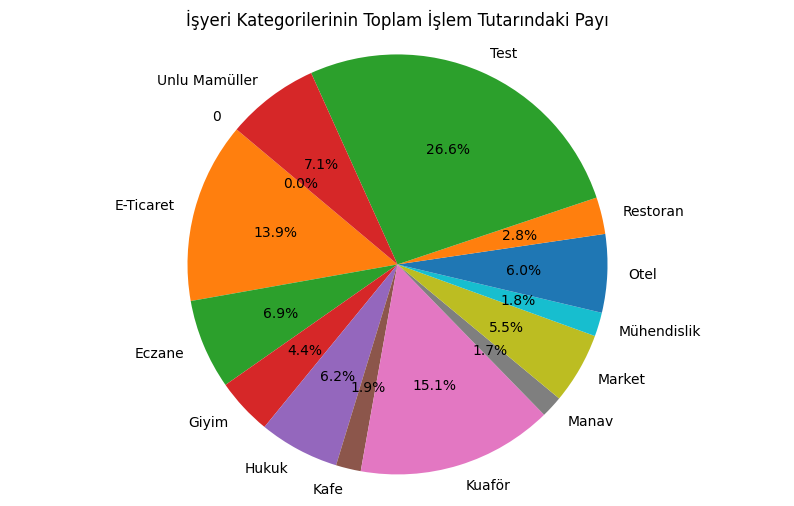

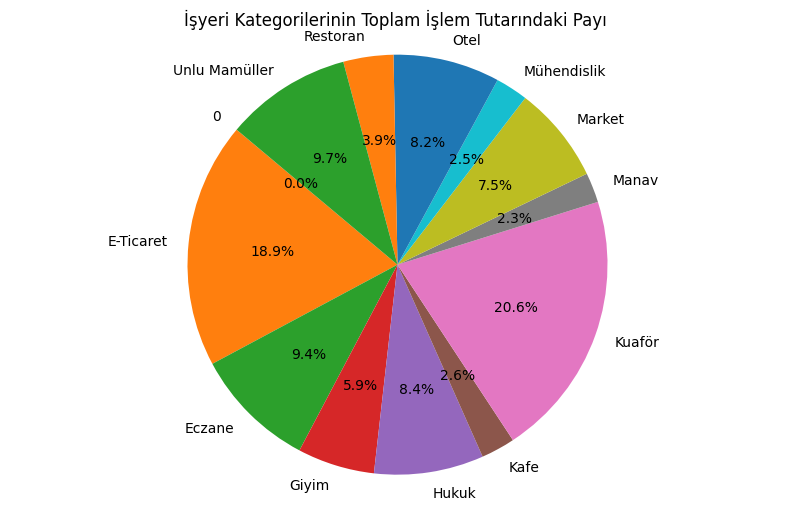

In [23]:

kategori_tutarlari = data.groupby("IsyeriKategori")["IslemTutar"].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.pie(kategori_tutarlari["IslemTutar"], labels=kategori_tutarlari["IsyeriKategori"], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title("İşyeri Kategorilerinin Toplam İşlem Tutarındaki Payı")
plt.show()

veri_filtrasyon = data[data["IsyeriKategori"] != "0"]
veri_filtrasyon = data[data["IsyeriKategori"] != "Test"]

kategori_tutarlari = veri_filtrasyon.groupby("IsyeriKategori")["IslemTutar"].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.pie(kategori_tutarlari["IslemTutar"], labels=kategori_tutarlari["IsyeriKategori"], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("İşyeri Kategorilerinin Toplam İşlem Tutarındaki Payı ")
plt.show()

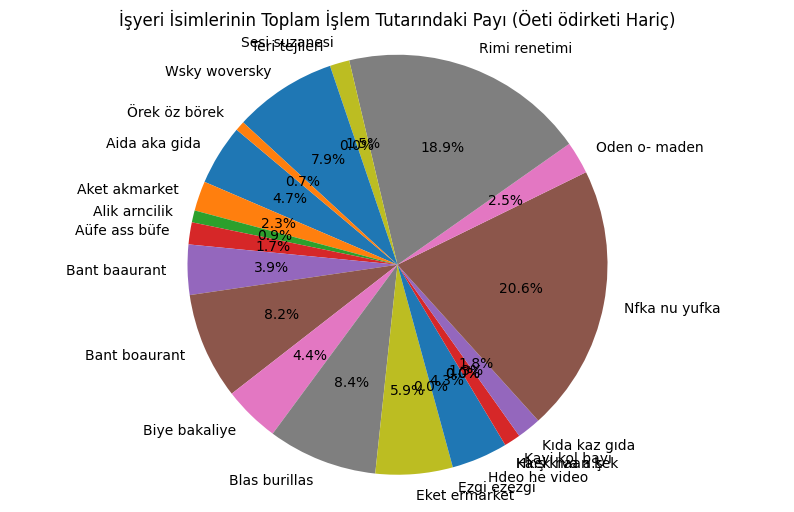

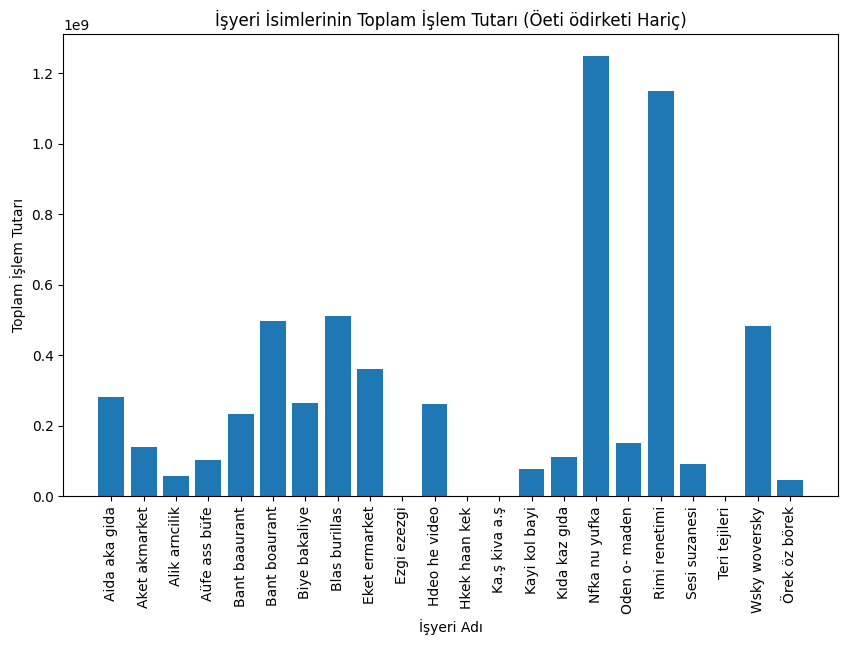

In [31]:

islem_tutarlari_filtreli = data[data["UyeIsyeriAdi"] != "Öeti ödirketi"]

islem_tutarlari = islem_tutarlari_filtreli.groupby("UyeIsyeriAdi")["IslemTutar"].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.pie(islem_tutarlari["IslemTutar"], labels=islem_tutarlari["UyeIsyeriAdi"], autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title("İşyeri İsimlerinin Toplam İşlem Tutarındaki Payı (Öeti ödirketi Hariç)")
plt.show()

islem_tutarlari = islem_tutarlari_filtreli.groupby("UyeIsyeriAdi")["IslemTutar"].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(islem_tutarlari["UyeIsyeriAdi"], islem_tutarlari["IslemTutar"])
plt.xticks(rotation=90)
plt.xlabel("İşyeri Adı")
plt.ylabel("Toplam İşlem Tutarı")
plt.title("İşyeri İsimlerinin Toplam İşlem Tutarı (Öeti ödirketi Hariç)")
plt.show()

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import plotly.express as px

data = pd.read_excel("C:\\Users\\caglars\\Desktop\\da.xlsx")

data = data[data["IsyeriKategori"] != "Test"]

data['Saat'] = pd.to_datetime(data['IslemTarih']).dt.hour

saat_ile_islem_adedi = data.groupby(['Saat', 'UyeIsyeriAdi'])['IslemID'].count().unstack().fillna(0)

fig = px.bar(saat_ile_islem_adedi, x=saat_ile_islem_adedi.index, y=saat_ile_islem_adedi.columns, labels={'Saat':'Saat', 'value':'İşlem Adedi'}, title="İşyerlerinin Saatlere Göre İşlem Adedi")

fig.show()

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import plotly.express as px

data = data[data["IsyeriKategori"] != "Test"]

data['Saat'] = pd.to_datetime(data['IslemTarih']).dt.hour

saat_ile_islem_adedi = data.groupby(['Saat', 'IsyeriKategori'])['IslemID'].count().unstack().fillna(0)

fig = px.bar(saat_ile_islem_adedi, x=saat_ile_islem_adedi.index, y=saat_ile_islem_adedi.columns, labels={'Saat':'Saat', 'value':'İşlem Adedi'}, title="Kategorilerin Saatlere Göre İşlem Adedi")

fig.show()

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import plotly.express as px

data = data[data["IsyeriKategori"] != "Test"]
data = data[data["UyeIsyeriDurum"] != "Pasif"]


data['Saat'] = pd.to_datetime(data['IslemTarih']).dt.hour

saat_ile_islem_adedi = data.groupby(['Saat', 'IsyeriKategori'])['IslemTutar'].sum().unstack().fillna(0)

fig = px.bar(saat_ile_islem_adedi, x=saat_ile_islem_adedi.index, y=saat_ile_islem_adedi.columns, labels={'Saat':'Saat', 'value':'İşlem Adedi'}, title="Kategorilerin Saatlere Göre İşlem Adedi")

fig.show()


data['Saat'] = pd.to_datetime(data['IslemTarih']).dt.hour

saat_ile_islem_adedi = data.groupby(['Saat', 'UyeIsyeriAdi'])['IslemTutar'].sum().unstack().fillna(0)

fig = px.bar(saat_ile_islem_adedi, x=saat_ile_islem_adedi.index, y=saat_ile_islem_adedi.columns, labels={'Saat':'Saat', 'value':'İşlem Adedi'}, title="İşyerlerinin Saatlere Göre İşlem Adedi")

fig.show()

In [50]:
import pandas as pd
import plotly.express as px

pasif_isyerler = veri[veri["UyeIsyeriDurum"] == "Pasif"]

pasif_isyerler['IslemYil'] = pd.to_datetime(pasif_isyerler['IslemTarih']).dt.year

isyeri_kimlikleri = pasif_isyerler['UyeIsyeriAdi'].unique()

for isyeri_kimlik in isyeri_kimlikleri:
    isyeri_verisi = pasif_isyerler[pasif_isyerler['UyeIsyeriAdi'] == isyeri_kimlik]
    tutar_yillara_gore = isyeri_verisi.groupby("IslemYil")["IslemTutar"].sum().reset_index()
    
    fig = px.line(tutar_yillara_gore, x="IslemYil", y="IslemTutar", labels={'IslemYil': 'Yıl', 'IslemTutar': 'Toplam İşlem Tutarı'}, title=f"İşyeri Kimlik: {isyeri_kimlik} - İşlem Tutarı")
    fig.show()


C:\Users\caglars\AppData\Local\Temp\ipykernel_7928\2353559128.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pasif_isyerler['IslemYil'] = pd.to_datetime(pasif_isyerler['IslemTarih']).dt.year


In [49]:
import pandas as pd
from datetime import datetime, timedelta



sirket_adi = input("Lütfen bir işyeri adı girin: ")
ay = input("Lütfen bir ay girin: ")

data = data[data["UyeIsyeriAdi"] == sirket_adi]

data['IslemTarih'] = pd.to_datetime(data['IslemTarih'])
data['IslemAy'] = data['IslemTarih'].dt.month
data['IslemYil'] = data['IslemTarih'].dt.year
data['Saat'] = data['IslemTarih'].dt.hour


data = data[(data["IslemAy"] == int(ay)) & (data["IslemYil"] == pd.to_datetime(data['IslemTarih']).dt.year.max())]

en_yogun_gun = data['IslemGun'].mode().values[0]

en_yogun_gun_data = data[data['IslemGun'] == en_yogun_gun]

en_yogun_saatler = en_yogun_gun_data.groupby(['Saat'])['IslemID'].count()
islem_orani = (en_yogun_gun_data.shape[0] / len(data)) * 100


en_yogun_saat = en_yogun_saatler.idxmax()
en_yogun_saat_adedi = en_yogun_saatler.max()

prompt_1 = f"{sirket_adi}, {ay}. ayda, en çok iş hacmini {en_yogun_gun} gününde yapmaktadır. Bu günün işlem hacmi, toplam içinde %{islem_orani:.2f}'lik işlem hacmini oluşturuyor."

prompt_2 = f"{sirket_adi}, {ay}. ayda, en çok iş hacmi oluşan gündeki işlerinin %{en_yogun_saat_adedi:.2f} {en_yogun_saat}:00 - {(en_yogun_saat + 1) % 24}:00 saatleri arasında oluşmaktadır."

print(prompt_1)
print(prompt_2)




Nfka nu yufka, 7. ayda, en çok iş hacmini Pazar gününde yapmaktadır. Bu günün işlem hacmi, toplam içinde %17.29'lik işlem hacmini oluşturuyor.
Nfka nu yufka, 7. ayda, en çok iş hacmi oluşan gündeki işlerinin %62.00 17:00 - 18:00 saatleri arasında oluşmaktadır.


In [ ]:
import pandas as pd
from datetime import datetime, timedelta

sirket_adi = input("Lütfen bir işyeri adı girin: ")
ay = input("Lütfen bir ay girin: ")

data = data[data["UyeIsyeriAdi"] == sirket_adi]

data['IslemTarih'] = pd.to_datetime(data['IslemTarih'])
data['IslemAy'] = data['IslemTarih'].dt.month
data['IslemYil'] = data['IslemTarih'].dt.year
data['IslemGun'] = data['IslemTarih'].dt.day
data['Saat'] = data['IslemTarih'].dt.hour

data = data[(data["IslemAy"] == int(ay)) & (data["IslemYil"] == pd.to_datetime(data['IslemTarih']).dt.year.max())]

en_yogun_gun = data['IslemGun'].mode().values[0]

en_yogun_gun_data = data[data['IslemGun'] == en_yogun_gun]

en_yogun_saatler = en_yogun_gun_data.groupby(['Saat'])['IslemID'].count()
islem_orani = (en_yogun_gun_data.shape[0] / len(data)) * 100

en_yogun_saat = en_yogun_saatler.idxmax()
en_yogun_saat_adedi = en_yogun_saatler.max()

prompt_1 = f"{sirket_adi}, {ay}. ayda, en çok iş hacmini {en_yogun_gun} gününde yapmaktadır. Bu günün işlem hacmi, toplam içinde %{islem_orani:.2f}'lik işlem hacmini oluşturuyor."

prompt_2 = f"{sirket_adi}, {ay}. ayda, en çok iş hacmi oluşan gündeki işlerinin %{en_yogun_saat_adedi:.2f} {en_yogun_saat}:00 - {(en_yogun_saat + 1) % 24}:00 saatleri arasında oluşmaktadır."

print(prompt_1)
print(prompt_2)

bugunku_tarih = datetime.now()

bugunku_data = data[
    (data['IslemAy'] == int(ay)) & (data['IslemGun'] == bugunku_tarih.day) & (data['Saat'] == bugunku_tarih.hour)
]
bugunku_islem_adedi = bugunku_data.shape[0]

yarin_tarihi = bugunku_tarih + timedelta(days=1)
yarin_data = data[
    (data['IslemAy'] == int(ay)) & (data['IslemGun'] == yarin_tarihi.day) & (data['Saat'] == bugunku_tarih.hour)
]
yarin_tahmini_islem_adedi = yarin_data.shape[0]

prompt_3 = f"Bugün tahmini işlem hacmi {bugunku_islem_adedi} adet en yoğun saat {bugunku_tarih.hour}:00, yarın tahmini işlem hacmi {yarin_tahmini_islem_adedi} adet en yoğun saat {bugunku_tarih.hour}:00 olacak."

print(prompt_3)


In [2]:
veri = pd.read_excel("C:\\Users\\caglars\\Desktop\\da.xlsx")

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX



uye_isyeri_adi = input("Lütfen UyeIsyeriAdi girin: ")

uye_isyeri_verileri = veri[veri['UyeIsyeriAdi'] == uye_isyeri_adi]

son_ay = uye_isyeri_verileri['IslemAy'].max()

son_ay_tutar = uye_isyeri_verileri[uye_isyeri_verileri['IslemAy'] == son_ay]['IslemTutar'].sum()

islem_id_sayisi = uye_isyeri_verileri['IslemID'].count()

abonelik_suresi = uye_isyeri_verileri['UyeIsyeriAbonelikSuresi'].values[0]

toplam_tutar = uye_isyeri_verileri['IslemTutar'].sum()

print("1 - Geçtiğimiz Ay ne kadar IslemTutar toplamı olmuş?")
print("2 - Son 6 Ay ne Kadar IslemTutar Toplamı olmuş?")
print("3 - Bulunduğumuz yıla ait aylara göre IslemTutar toplam çizgi grafiği ve yıl sonuna kadar ki tahmin grafiği")
print("4 - Bugün Ne kadar IslemId toplamı olacak? ve ne kadar IslemTutar olacak? tahmin")
print("5 - Bu Hafta Ne kadar IslemId toplamı olacak? ve ne kadar IslemTutar olacak? tahmin")
print("6 - Bu Ay Ne kadar IslemId toplamı olacak? ve ne kadar IslemTutar olacak? tahmin")
print("7 - Bu Ay en çok hangi tarihte ne kadar IslemId toplamı olacak? tahmin")

secim = int(input("Lütfen bir seçim yapın (1-9): "))

if secim == 1:
    print(f"Geçtiğimiz Ay IslemTutar Toplamı: {son_ay_tutar} ₺")
    
elif secim == 2:
    son_6_ay = son_ay - 6
    son_6_ay_tutar = uye_isyeri_verileri[uye_isyeri_verileri['IslemAy'] >= son_6_ay]['IslemTutar'].sum()
    print(f"Son 6 Ay IslemTutar Toplamı: {son_6_ay_tutar} ₺")
    
elif secim == 3:
    simdiki_tarih = datetime.now()
    simdiki_yil = simdiki_tarih.year
    simdiki_ay = simdiki_tarih.month

    mevcut_ay_verileri = uye_isyeri_verileri[(uye_isyeri_verileri['IslemYıl'] == simdiki_yil) & (uye_isyeri_verileri['IslemAy'] == simdiki_ay)]
    mevcut_ay_tutar = mevcut_ay_verileri['IslemTutar'].sum()

    tarihler = [f"{simdiki_yil}-{ay}" for ay in range(1, simdiki_ay + 1)]
    tahminler = [uye_isyeri_verileri[(uye_isyeri_verileri['IslemYıl'] == simdiki_yil) & (uye_isyeri_verileri['IslemAy'] == ay)]['IslemTutar'].sum() for ay in range(1, simdiki_ay + 1)]

    ortalamalar = []
    for ay in [11, 12]:
        ay_ortalamasi = 0
        yil_sayisi = simdiki_yil - 2020
        for yil in range(2020, simdiki_yil):
            gecmis_aylar = uye_isyeri_verileri[(uye_isyeri_verileri['IslemYıl'] == yil) & (uye_isyeri_verileri['IslemAy'] == ay)]
            ay_ortalamasi += gecmis_aylar['IslemTutar'].sum()
        ay_ortalamasi /= yil_sayisi
        ortalamalar.append(ay_ortalamasi)

    tarihler.extend([f"{simdiki_yil}-{11}", f"{simdiki_yil}-{12}"])
    tahminler.extend(ortalamalar)

    plt.figure(figsize=(10, 6))
    plt.plot(tarihler[:simdiki_ay], tahminler[:simdiki_ay], marker='o', label='Gerçekleşen', color='blue')
    plt.plot(tarihler[simdiki_ay-1:], tahminler[simdiki_ay-1:], marker='o', label='Tahmin', linestyle='--', color='red')
    plt.xlabel('Ay')
    plt.ylabel('IslemTutar')
    plt.title('Mevcut Ayın Gerçekleşen IslemTutarı ve Gelecek Ayların Tahmini (Ortalama ile)')
    plt.legend()
    plt.show()


elif secim == 4:
    simdiki_tarih = datetime.now().date()
    haftanin_ilk_gunu = simdiki_tarih - timedelta(days=simdiki_tarih.weekday())
    hafta_sonu = haftanin_ilk_gunu + timedelta(days=6)
    
    haftanin_ilk_gunu = pd.to_datetime(haftanin_ilk_gunu)
    hafta_sonu = pd.to_datetime(hafta_sonu)
    
    gecmis_yil_ayni_hafta = uye_isyeri_verileri[(uye_isyeri_verileri['IslemTarih'] >= haftanin_ilk_gunu - pd.DateOffset(years=1)) & (uye_isyeri_verileri['IslemTarih'] <= hafta_sonu - pd.DateOffset(years=1))]
    gecmis_yil_ayni_hafta_islem_id_ort = gecmis_yil_ayni_hafta['IslemID'].count()
    gecmis_yil_ayni_hafta_islem_tutar_ort = gecmis_yil_ayni_hafta['IslemTutar'].sum()
    
    print(f"Bugün tahmini işlem sayısı : {int(gecmis_yil_ayni_hafta_islem_id_ort / 7)} adet")
    print(f"Bugün tahmini işlem tutarı: {gecmis_yil_ayni_hafta_islem_tutar_ort/7} ₺")


elif secim == 5:
    simdiki_tarih = datetime.now().date()
    haftanin_ilk_gunu = simdiki_tarih - timedelta(days=simdiki_tarih.weekday())
    hafta_sonu = haftanin_ilk_gunu + timedelta(days=6)
    
    haftanin_ilk_gunu = pd.to_datetime(haftanin_ilk_gunu)
    hafta_sonu = pd.to_datetime(hafta_sonu)
    
    gecmis_yil_ayni_hafta = uye_isyeri_verileri[(uye_isyeri_verileri['IslemTarih'] >= haftanin_ilk_gunu - pd.DateOffset(years=1)) & (uye_isyeri_verileri['IslemTarih'] <= hafta_sonu - pd.DateOffset(years=1))]
    gecmis_yil_ayni_hafta_islem_id_ort = gecmis_yil_ayni_hafta['IslemID'].count()
    gecmis_yil_ayni_hafta_islem_tutar_ort = gecmis_yil_ayni_hafta['IslemTutar'].sum()
    
    print(f"Bu Hafta tahmini işlem sayısı : {gecmis_yil_ayni_hafta_islem_id_ort} adet")
    print(f"Bu Hafta toplam işlem tutarı: {gecmis_yil_ayni_hafta_islem_tutar_ort} ₺")

elif secim == 6:
    simdiki_tarih = datetime.now().date()
    simdiki_ay = simdiki_tarih.month

    gecmis_yil_ay = uye_isyeri_verileri[(uye_isyeri_verileri['IslemTarih'].dt.month == simdiki_ay - 1) & (uye_isyeri_verileri['IslemTarih'].dt.year < simdiki_tarih.year)]

    gecmis_yil_ay_islem_id_ort = gecmis_yil_ay['IslemID'].count()
    gecmis_yil_ay_islem_tutar_ort = gecmis_yil_ay['IslemTutar'].sum()

    print(f"Bu ay tahmini işlem sayısı : {gecmis_yil_ay_islem_id_ort} adet")
    print(f"Bu ay toplam işlem tutarı: {gecmis_yil_ay_islem_tutar_ort} ₺")


elif secim == 7:
    ayin_gunleri = range(1, 32)

    en_cok_islem_yapilan_gun = None
    en_cok_islem_sayisi = 0

    for gun in ayin_gunleri:
        ayni_gun_islemleri = uye_isyeri_verileri[
            (uye_isyeri_verileri['IslemTarih'].dt.month == son_ay) &
            (uye_isyeri_verileri['IslemTarih'].dt.day == gun)
        ]
        islem_sayisi = ayni_gun_islemleri['IslemID'].count()

        if islem_sayisi > en_cok_islem_sayisi:
            en_cok_islem_sayisi = islem_sayisi
            en_cok_islem_yapilan_gun = gun

    if en_cok_islem_yapilan_gun is not None:
        print(f"Bu ay tahmini en çok iş: Ayın {en_cok_islem_yapilan_gun}. günü, Toplam İşlem Sayısı: {en_cok_islem_sayisi}")
    else:
        print(f"Belirtilen ay için veri bulunamadı.")




1 - Geçtiğimiz Ay ne kadar IslemTutar toplamı olmuş?
2 - Son 6 Ay ne Kadar IslemTutar Toplamı olmuş?
3 - Bulunduğumuz yıla ait aylara göre IslemTutar toplam çizgi grafiği ve yıl sonuna kadar ki tahmin grafiği
4 - Bugün Ne kadar IslemId toplamı olacak? ve ne kadar IslemTutar olacak? tahmin
5 - Bu Hafta Ne kadar IslemId toplamı olacak? ve ne kadar IslemTutar olacak? tahmin
6 - Bu Ay Ne kadar IslemId toplamı olacak? ve ne kadar IslemTutar olacak? tahmin
7 - Bu Ay en çok hangi tarihte ne kadar IslemId toplamı olacak? tahmin
8 - Bu Hafta en çok hangi günde IslemId olacak? Hangi saatler yoğun olacak? tahmin
9 - Bu Ay sonu ne kadar IslemTutar toplamı olacak? tahmin
Bu Hafta en çok hangi günde IslemId olacak: 2023-11-06, Saat: 0, IslemId Sayısı: 0
